# Pymaceuticals Inc.
---

### Analysis

1. Tumor volume under the treatments Ramicane and Capomulin are the smallest, 40.2mm3 and 40.7mm3 in average respectively.
Tumor volume under the treatment Ketapril is the largest, 55.2mm3.
2. The treatment distribution is quite even, from 148(for Propriva) to 230(for Capomulin).
3. Sex proportion is even. Male mice is account for 51% of total.
4. There is a strong positive relationship between mouse weight and the average tumor volume.
 

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_combined = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [12]:
# Checking the number of mice.
mice_count = mouse_metadata['Mouse ID'].count()
mice_count

249

In [32]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data_combined[mouse_data_combined.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [37]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = mouse_data_combined[mouse_data_combined.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_combined_clean = mouse_data_combined[mouse_data_combined["Mouse ID"]!="g989"]
mouse_data_combined_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [40]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = len(mouse_data_combined_clean["Mouse ID"].unique())
mice_count_clean

248

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = mouse_data_combined_clean.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_median = mouse_data_combined_clean.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_variance = mouse_data_combined_clean.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_std = mouse_data_combined_clean.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_sem = mouse_data_combined_clean.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
regimen_summary = pd.DataFrame({"Drug Regimen":tumor_mean.index,
                                'Mean Tumor Volume':tumor_mean.values,
                                'Median Tumor Volume':tumor_median.values,
                                'Tumor Volume Variance':tumor_variance.values,
                                'Tumor Volume Std. Dev.':tumor_std.values,
                                'Tumor Volume Std. Err.':tumor_sem.values,
                               }).set_index("Drug Regimen")
regimen_summary
                                

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [55]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary_oneline = mouse_data_combined_clean.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
regimen_summary_oneline
                                                         

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

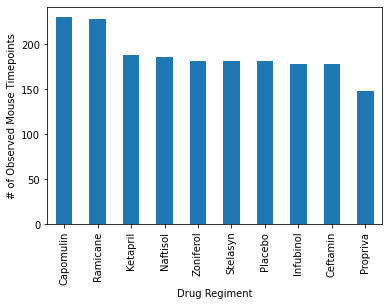

In [238]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_df = mouse_data_combined_clean.groupby('Drug Regimen')['Mouse ID'].count()
bar_df = bar_df.sort_values(ascending=False)
bar_df.plot(kind="bar",x=bar_df.index, y=bar_df.values)
# add labels and title
plt.xlabel('Drug Regiment')
plt.ylabel('# of Observed Mouse Timepoints')

# rotate the x-axis labels
plt.xticks(rotation=90)

# show the plot
plt.show()

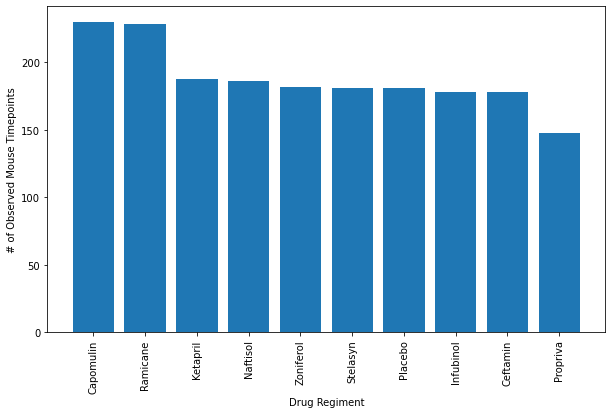

In [84]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_df = mouse_data_combined_clean.groupby('Drug Regimen')['Mouse ID'].count()
# create a bar plot

bar_df = bar_df.sort_values(ascending=False)
plt.bar(bar_df.index, bar_df.values)

# add labels and title
plt.xlabel('Drug Regiment')
plt.ylabel('# of Observed Mouse Timepoints')

# rotate the x-axis labels
plt.xticks(rotation=90)

# show the plot
plt.show()


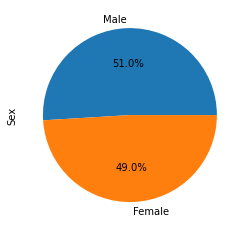

In [139]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_df = mouse_data_combined_clean.groupby('Sex')['Sex'].count()
pie_df = pie_df.sort_values(ascending=False).plot(kind="pie",autopct='%1.1f%%')


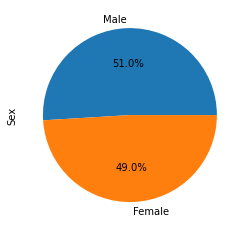

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_df = mouse_data_combined_clean.groupby('Sex')['Mouse ID'].count()
pie_df = pie_df.sort_values(ascending=False)

plt.ylabel('Sex')
plt.pie(pie_df.values,labels=pie_df.index, autopct='%1.1f%%',startangle=0)

# show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [172]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df = mouse_data_combined_clean
mice_max_timepoint = df.loc[df.groupby('Mouse ID')['Timepoint'].idxmax()]
mice_max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mice_max_timepoint_merged= pd.merge(mouse_metadata, mice_max_timepoint,how="left", on=["Mouse ID", "Mouse ID"])
mice_max_timepoint_merged

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y
0,k403,Ramicane,Male,21,16,45.0,22.050126,1.0,Ramicane,Male,21.0,16.0
1,s185,Capomulin,Female,3,17,45.0,23.343598,1.0,Capomulin,Female,3.0,17.0
2,x401,Capomulin,Female,16,15,45.0,28.484033,0.0,Capomulin,Female,16.0,15.0
3,m601,Capomulin,Male,22,17,45.0,28.430964,1.0,Capomulin,Male,22.0,17.0
4,g791,Ramicane,Male,11,16,45.0,29.128472,1.0,Ramicane,Male,11.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5.0,45.934712,0.0,Stelasyn,Female,21.0,28.0
245,z435,Propriva,Female,12,26,10.0,48.710661,0.0,Propriva,Female,12.0,26.0
246,z581,Infubinol,Female,24,25,45.0,62.754451,3.0,Infubinol,Female,24.0,25.0
247,z795,Naftisol,Female,13,29,45.0,65.741070,3.0,Naftisol,Female,13.0,29.0


In [177]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
grouped = mice_max_timepoint_merged.groupby("Drug Regimen_x")
    
    # add subset 
q1 = grouped['Tumor Volume (mm3)'].quantile(0.25)
q3 = grouped['Tumor Volume (mm3)'].quantile(0.75)
IQR=q3-q1
outliers={}
for treatment in treatments:
    LB = q1[treatment]-1.5*IQR[treatment]
    UB = q3[treatment]+1.5*IQR[treatment]
    outliers[treatment] = mice_max_timepoint_merged[(mice_max_timepoint_merged['Drug Regimen_x']==treatment) & ((mice_max_timepoint_merged['Tumor Volume (mm3)']<LB)|(mice_max_timepoint_merged['Tumor Volume (mm3)']>UB))]['Tumor Volume (mm3)']
for treatment in treatments:
    print(treatment + "'s potential outliers:  " + str(outliers[treatment]))
    #print(f"{treatment}s potential outliers: " + str(outliers[treatment])

    # Determine outliers using upper and lower bounds


Capomulin's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:  74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)


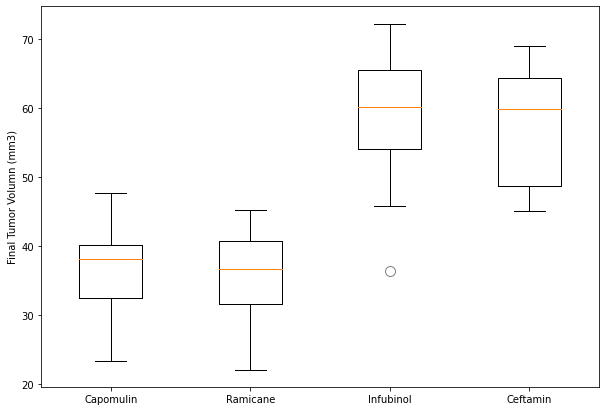

In [193]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
df = mice_max_timepoint_merged
df_filtered = df[df['Drug Regimen_x'].isin(treatments)]
# Create a figure instance
fig = plt.figure(figsize=(10, 7))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot([df_filtered[df_filtered['Drug Regimen_x'] == c]['Tumor Volume (mm3)'] for c in treatments])

# Highlight the outliers in red
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5, markersize=10)

# Add title and axis labels
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('Final Tumor Volumn (mm3)')

# Set x-axis tick labels
ax.set_xticklabels(treatments)

# Show the plot
plt.show()

## Line and Scatter Plots

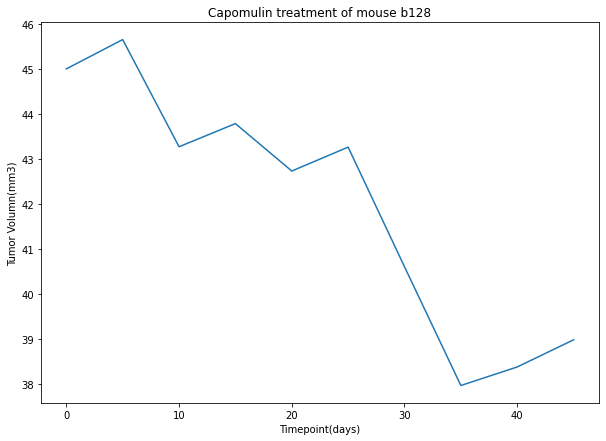

In [212]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df = mouse_data_combined
df_fil = df[df['Mouse ID']=='b128']

# Create a figure instance
fig = plt.figure(figsize=(10, 7))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the line chart
ax.plot(df_fil['Timepoint'], df_fil['Tumor Volume (mm3)'])

# Add title and axis labels
ax.set_title('Capomulin treatment of mouse b128')
ax.set_xlabel('Timepoint(days)')
x=ax.set_ylabel('Tumor Volumn(mm3)')

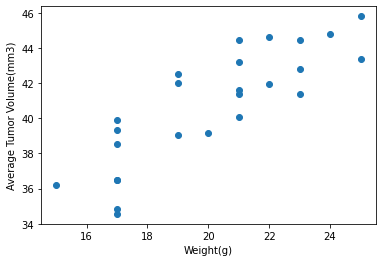

In [223]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
df = mouse_data_combined_clean
mice_mean_tumor = df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
df_tumor= pd.merge(mice_max_timepoint_merged, mice_mean_tumor,how="left", on=["Mouse ID", "Mouse ID"])
df_tumor = df_tumor[df_tumor['Drug Regimen_x']=="Capomulin"]

plt.scatter(df_tumor['Weight (g)_x'],df_tumor['Tumor Volume (mm3)_y'])
# Add title and labels
plt.title('')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume(mm3)')

# Show plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.95


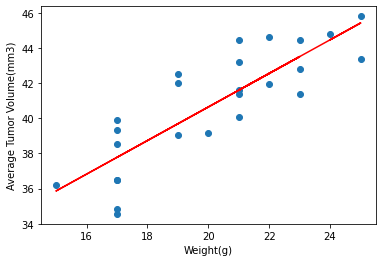

In [241]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import numpy as np
corr_coef =df_tumor['Weight (g)_x'].corr(df_tumor['Tumor Volume (mm3)_y'])
# Calculate linear regression line
x=df_tumor['Weight (g)_x']
y=df_tumor['Tumor Volume (mm3)_y']
slope, intercept = np.polyfit(x, y, 1)
line = slope * x + intercept

# Create scatter plot with linear regression line
plt.scatter(x,y)
plt.plot(x, line, color='red')

# Add title and labels
plt.title('')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume(mm3)')

slope = round(slope,2)
print("The correlation between mouse weight and the average tumor volume is " + str(slope))
# Show plot
plt.show()